In [1]:
from qiskit import QuantumCircuit, transpile, Aer

import utilities_multiples as ut_multiples
import multiples_functions as mult

import matplotlib.pyplot as plt

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

# Multiples of 3 with 4 qubits as input

In [3]:
K = 3

In [4]:
nqubits_input = 4
N = 2**nqubits_input # Total number of states

In [5]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True, classic_register=True)

In [6]:
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

In [7]:
circuit.append(diffuser, range(nqubits_input))

In [8]:
circuit.measure(range(nqubits_input), range(nqubits_input))

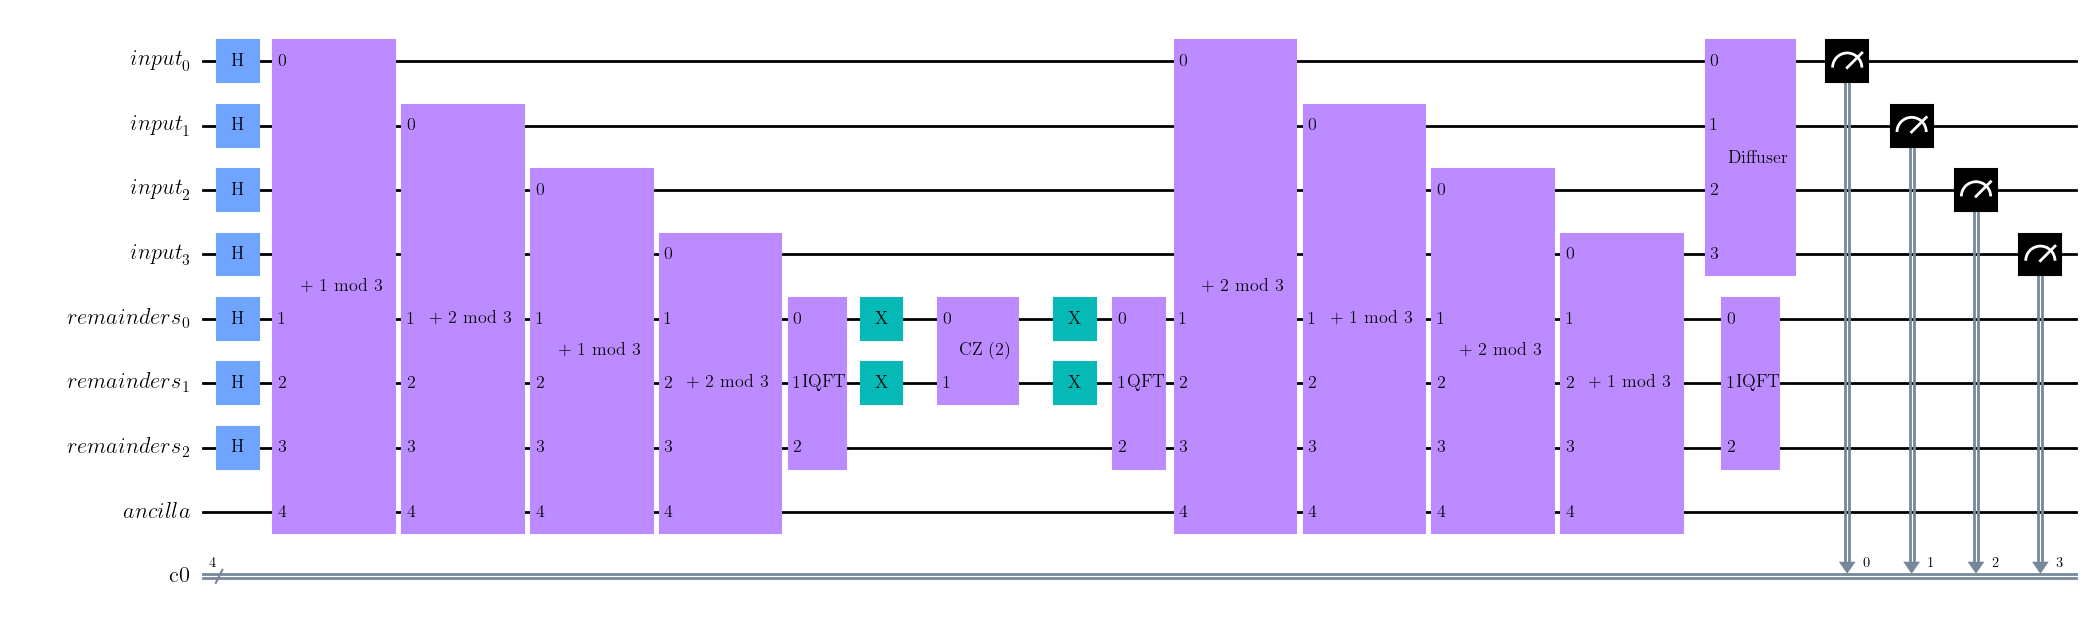

In [9]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [10]:
nshots = 20000

### Choose Backend

In [11]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [12]:
qc_transpiled=transpile(circuit, backend=backend)

In [13]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [14]:
result = job.result()

In [15]:
result.get_counts()

{'1000': 318,
 '0000': 2827,
 '1001': 2844,
 '0110': 2893,
 '1111': 2812,
 '0101': 311,
 '1100': 2733,
 '0010': 326,
 '0011': 2792,
 '1010': 293,
 '0111': 313,
 '1101': 322,
 '0001': 318,
 '1110': 308,
 '0100': 300,
 '1011': 290}

# Plots

In [16]:
x_desired = list(range(0, N, 3))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [19]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=65

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.065, 0.5)

## Plotting

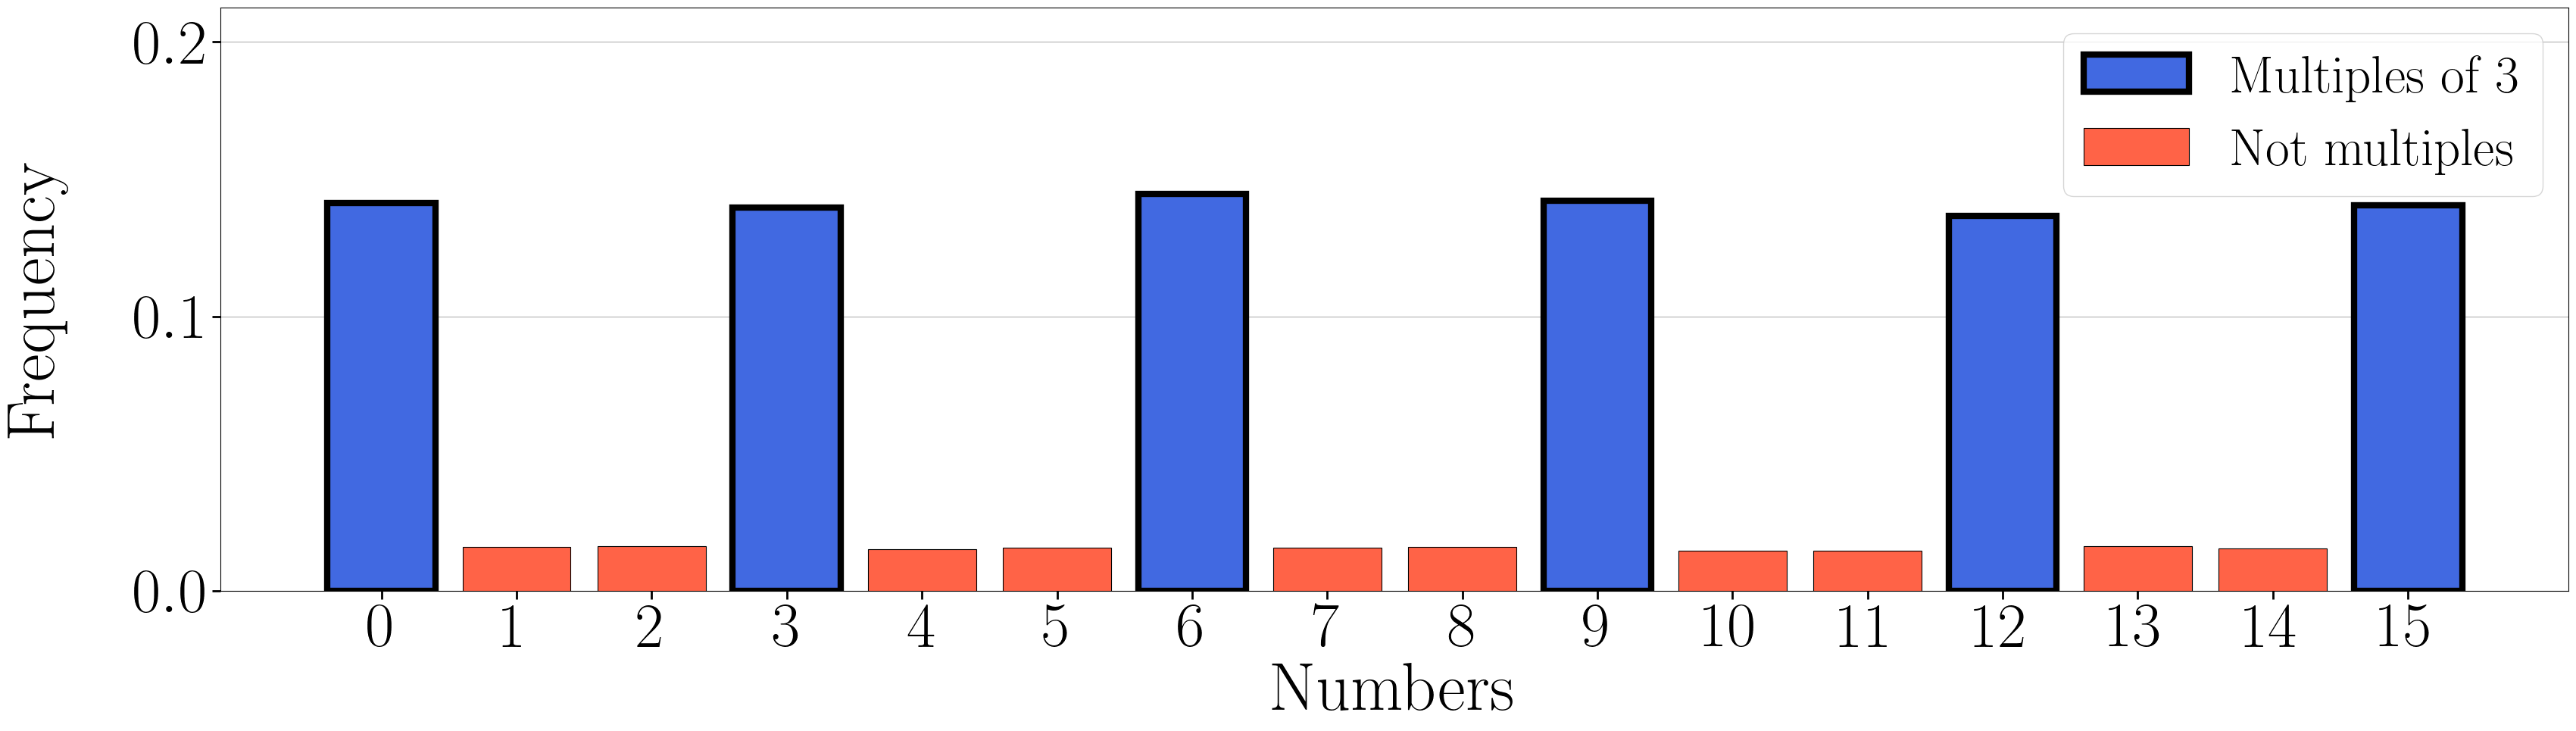

In [22]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%3==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.4*lims[1])
    

ax.legend(fontsize=fontsize-15, loc='upper right')

ax.tick_params(width=2, size=8)

plt.savefig(fname='plots_simulations/simulation_%d_K_%d_qubits.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

# Multiples of 5 with 6 qubits as input

In [30]:
K = 5

In [31]:
nqubits_input = 6
N = 2**nqubits_input # Total number of states

In [32]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True, classic_register=True)

In [33]:
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

In [34]:
circuit.append(diffuser, range(nqubits_input))

In [35]:
circuit.measure(range(nqubits_input), range(nqubits_input))

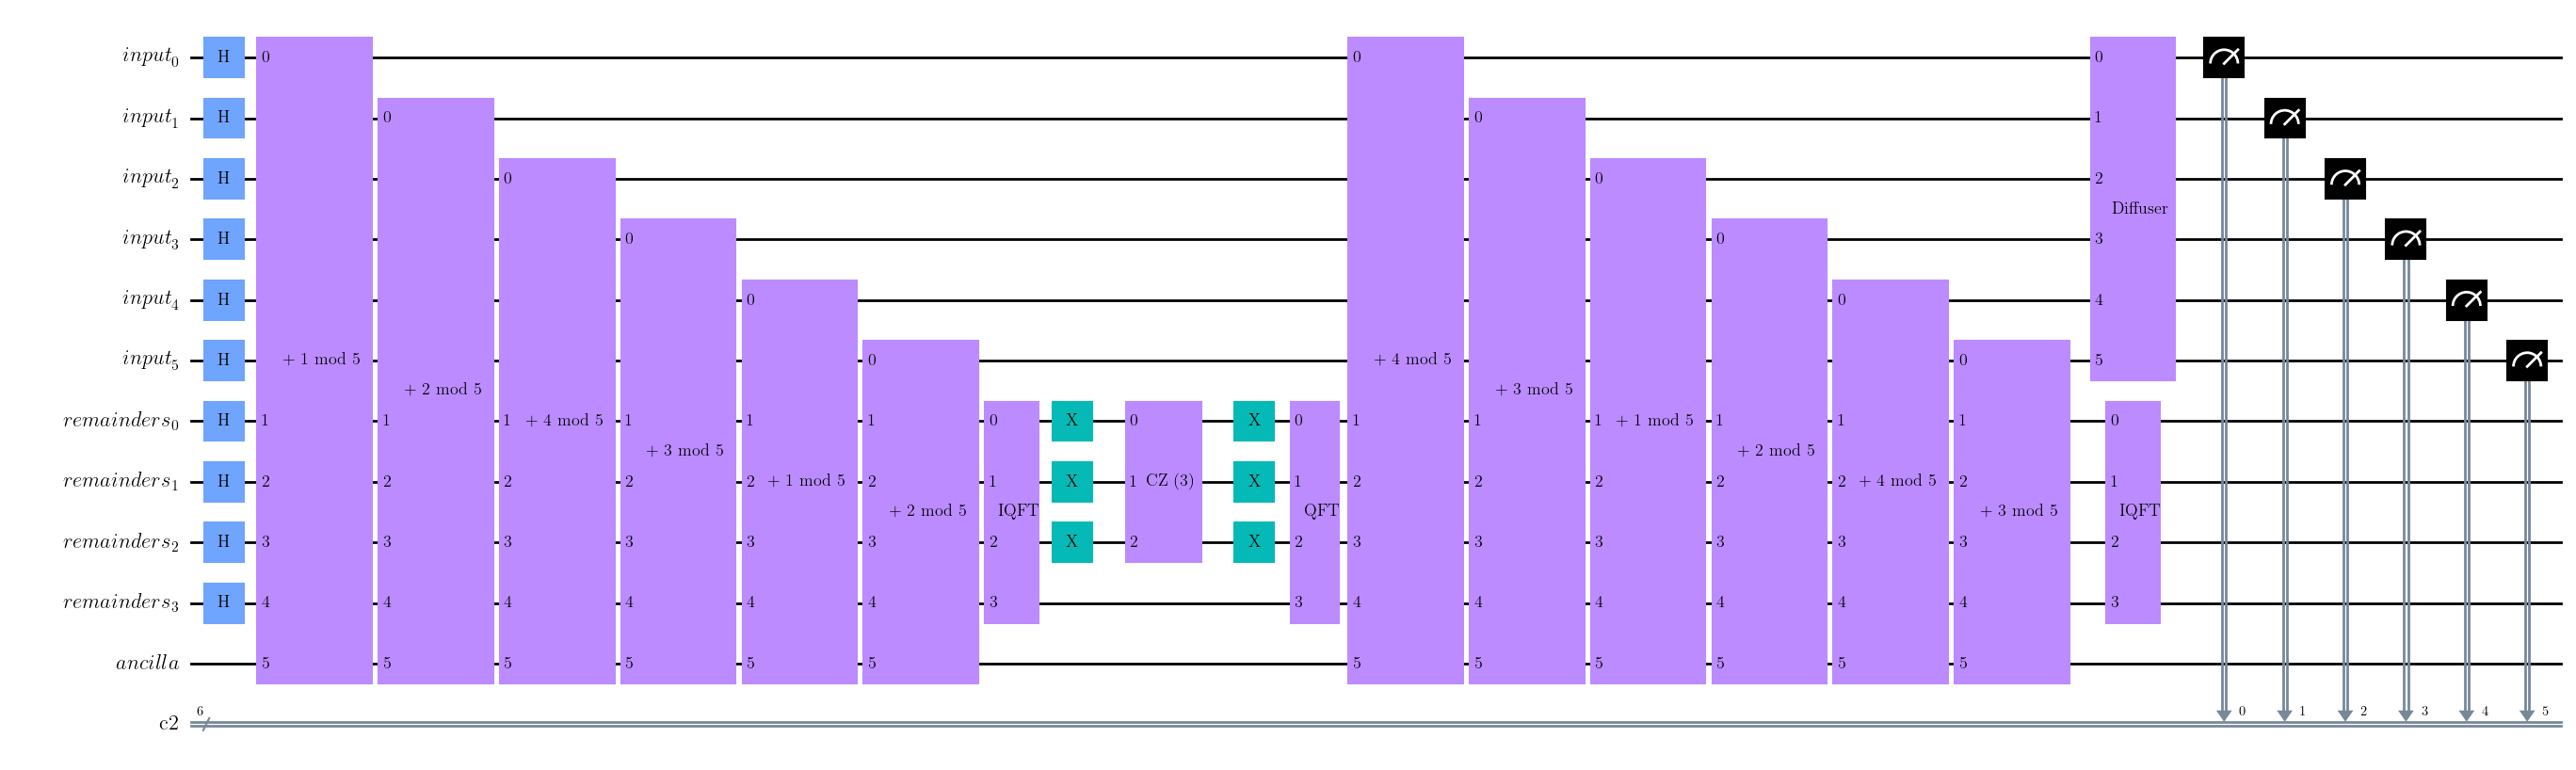

In [36]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [37]:
nshots = 20000

### Choose Backend

In [38]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [39]:
qc_transpiled=transpile(circuit, backend=backend)

In [40]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [41]:
result = job.result()

In [42]:
result.get_counts()

{'011110': 1445,
 '001101': 7,
 '100100': 9,
 '111100': 1575,
 '101110': 9,
 '110010': 1463,
 '000101': 1516,
 '011001': 1531,
 '000000': 1558,
 '110111': 1464,
 '101000': 1442,
 '111111': 12,
 '100001': 10,
 '001010': 1479,
 '111101': 9,
 '001100': 19,
 '100011': 1553,
 '000100': 14,
 '110011': 10,
 '101101': 1437,
 '100110': 11,
 '111010': 15,
 '001111': 1470,
 '110100': 12,
 '101100': 17,
 '000011': 8,
 '110101': 18,
 '101011': 16,
 '000010': 21,
 '100101': 10,
 '111011': 12,
 '001110': 12,
 '010100': 1485,
 '010011': 13,
 '011100': 8,
 '101111': 10,
 '110001': 14,
 '000110': 14,
 '001001': 10,
 '111000': 14,
 '010010': 12,
 '010101': 12,
 '000111': 10,
 '110000': 6,
 '001000': 14,
 '011101': 10,
 '101001': 13,
 '100010': 7,
 '001011': 9,
 '111110': 9,
 '000001': 14,
 '101010': 11,
 '110110': 13,
 '100111': 10,
 '011000': 6,
 '100000': 13,
 '111001': 14,
 '010000': 13,
 '011010': 6,
 '011111': 8,
 '010111': 10,
 '011011': 10,
 '010001': 8,
 '010110': 10}

# Plots

In [43]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [45]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=65

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

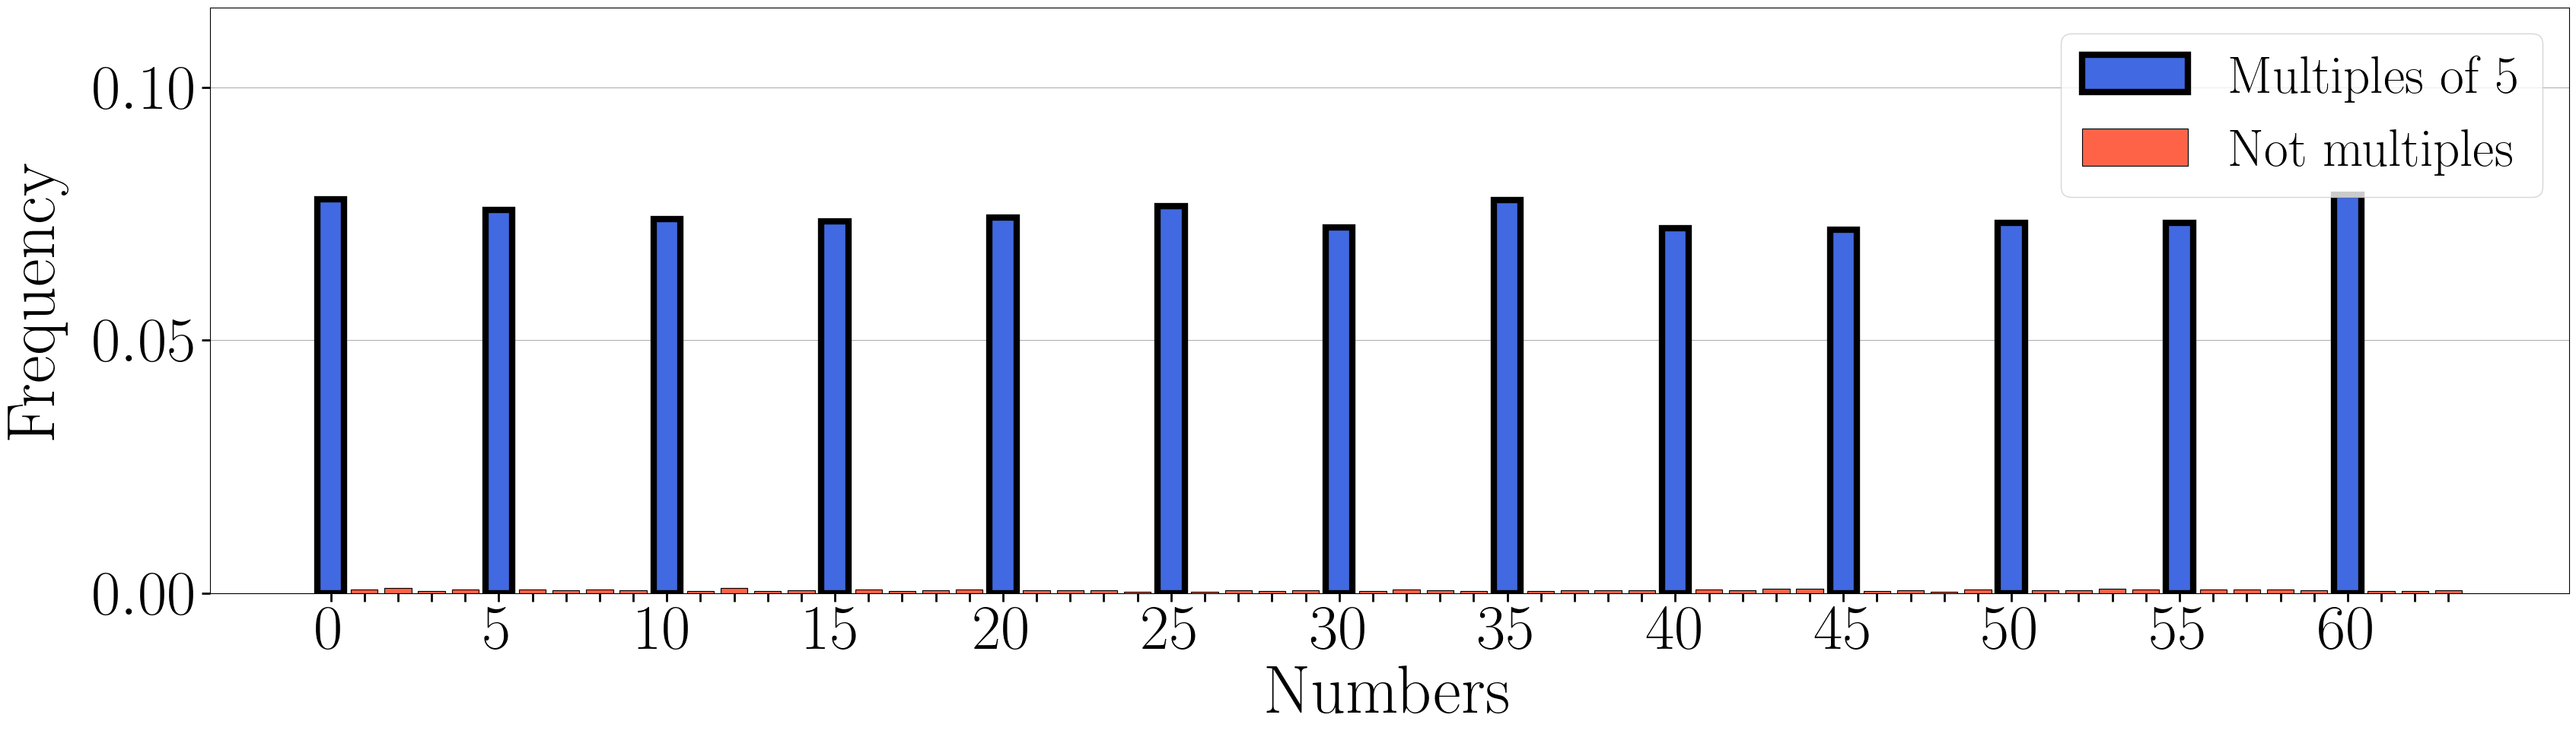

In [49]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

ax.set_xticklabels([str(a) if a%K==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.4*lims[1])
    

ax.legend(fontsize=fontsize-15, loc='upper right')

ax.tick_params(width=2, size=8)

plt.savefig(fname='plot_simulations/simulation_%d_K_%d_qubits.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

# Multiples of 17 with 5 qubits as input

In [29]:
K = 14

In [30]:
nqubits_input = 5
N = 2**nqubits_input # Total number of states

In [31]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True, classic_register=True)
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)
circuit.append(diffuser, range(nqubits_input))
circuit.measure(range(nqubits_input), range(nqubits_input))

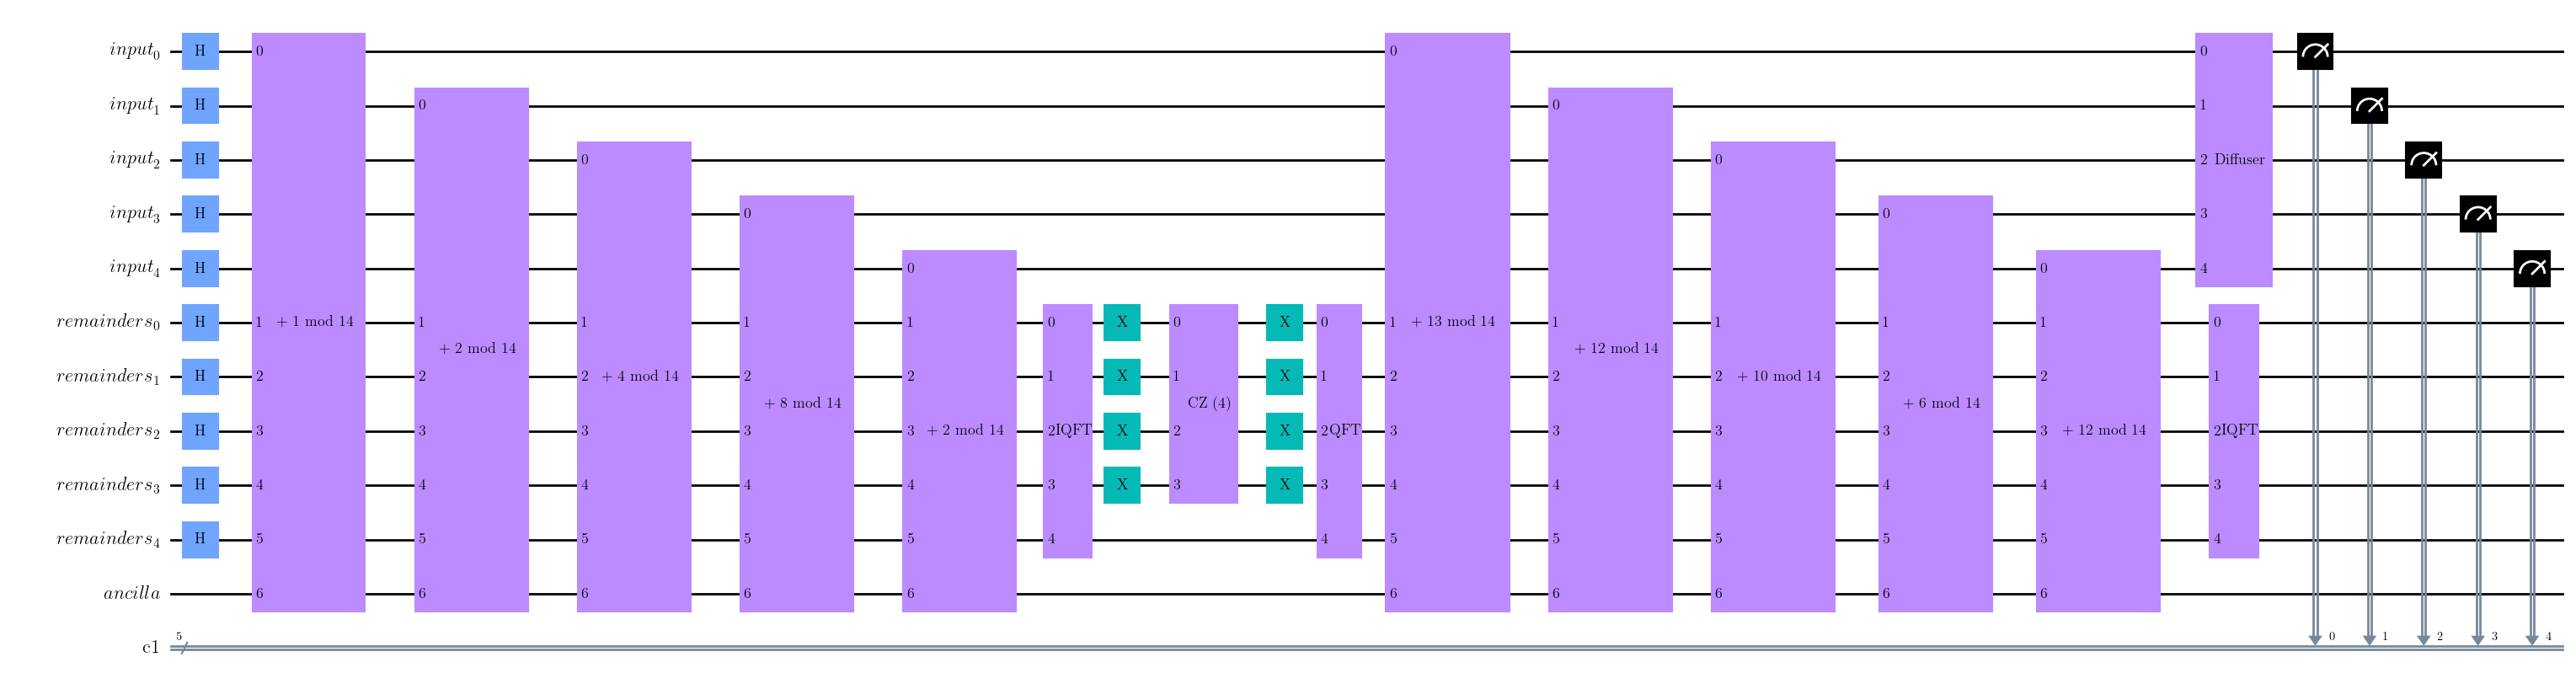

In [32]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [33]:
nshots = 20000

### Choose Backend

In [34]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [35]:
qc_transpiled=transpile(circuit, backend=backend)

In [36]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [37]:
result = job.result()

# Plots

In [38]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [39]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=60

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

In [41]:
ax.get_yticks()

array([0. , 0.2, 0.4, 0.6])

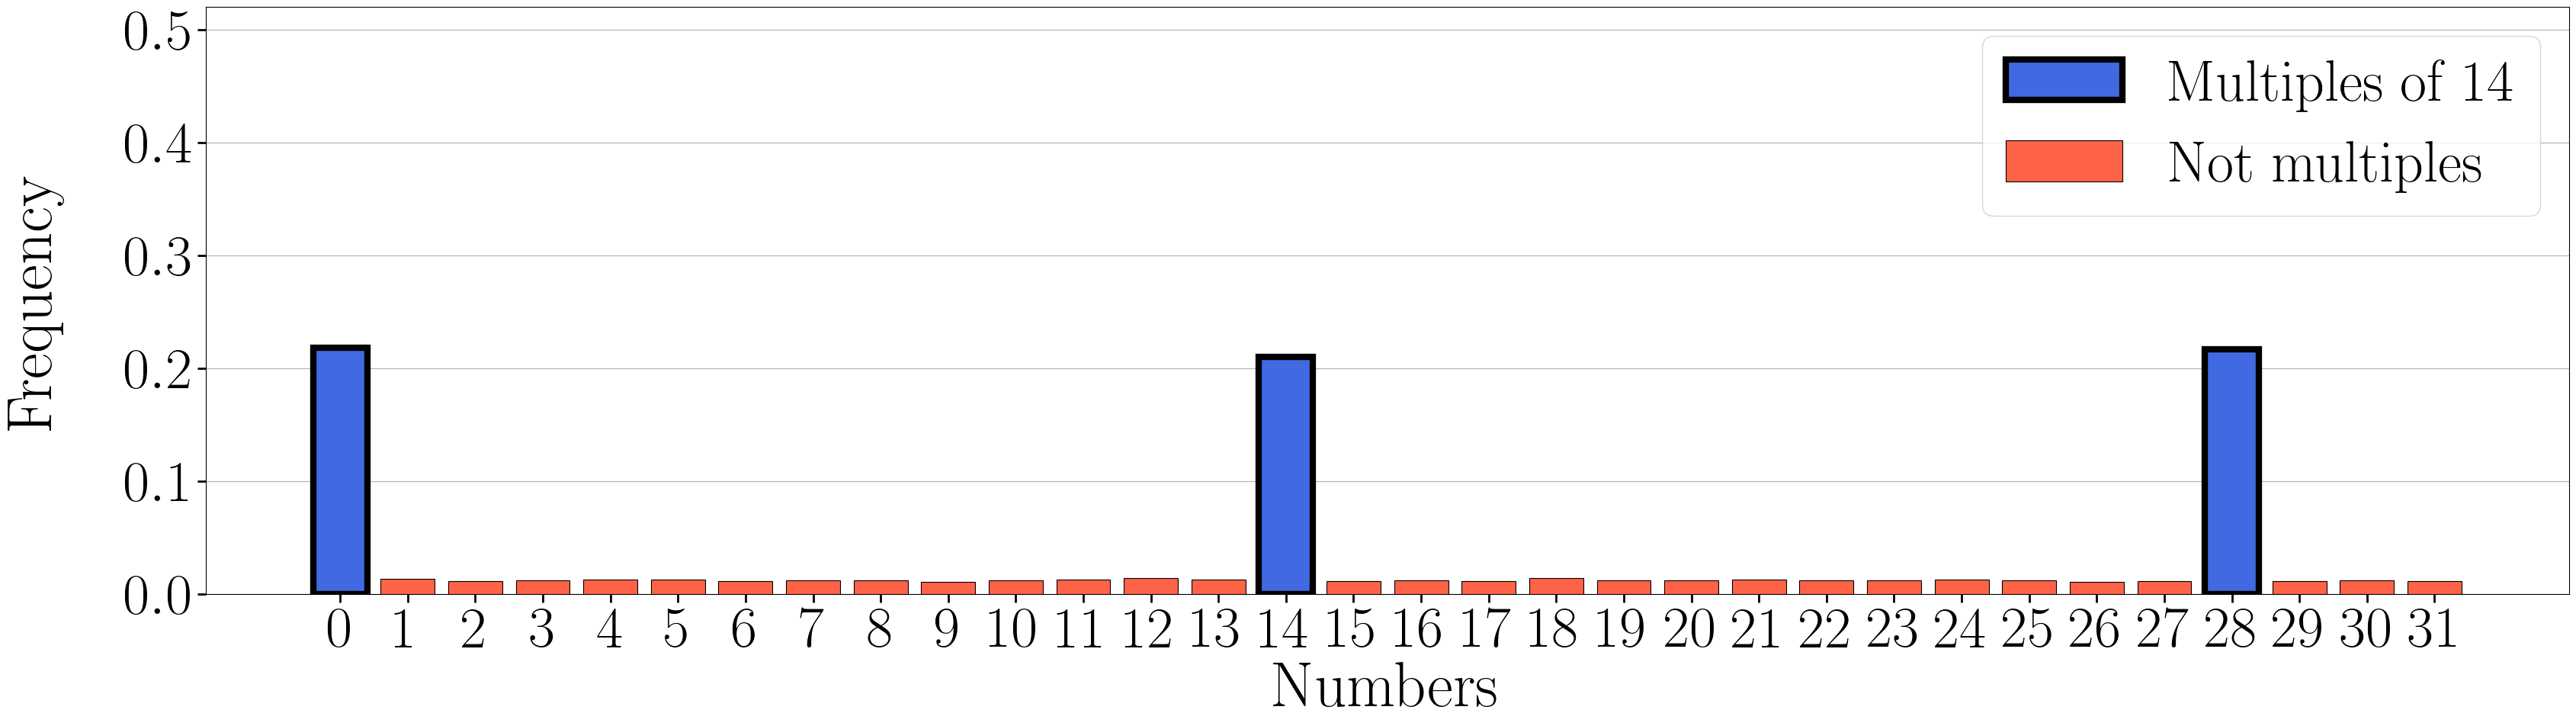

In [44]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.set_yticks([a/10 for a in range(7)])

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%K==0 or a%5==0 else ' ' for a in range(N)])

# lims = ax.get_ylim()

# ax.set_ylim(lims[0], 1.35*lims[1])

ax.set_ylim(0, 0.52)
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)

plt.savefig(fname='plots_simulations/simulation_%d_K_%d_qubits_one_rep.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

## Repeating twice

In [45]:
oracle = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=False, classic_register=False)

nqubits = oracle.num_qubits

circuit = QuantumCircuit(nqubits, nqubits_input)

circuit.h(range(nqubits_input))

circuit.append(oracle, range(nqubits))#, range(nqubits_input))

diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

circuit.append(diffuser, range(nqubits_input))

circuit.append(oracle, range(nqubits))#, range(nqubits_input))

circuit.append(diffuser, range(nqubits_input))

In [46]:
circuit.measure(range(nqubits_input), range(nqubits_input))

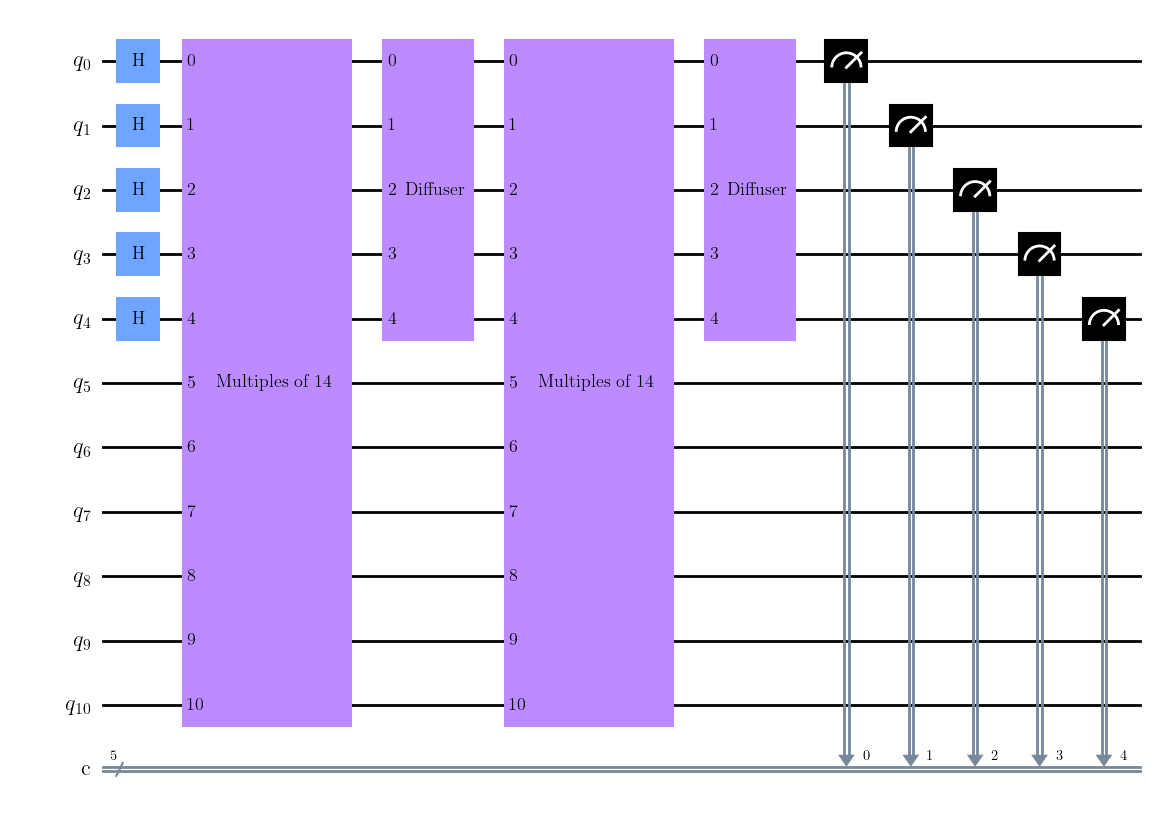

In [47]:
circuit.draw('mpl')

## Simulation

In [48]:
nshots = 20000

### Choose Backend

In [49]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [50]:
qc_transpiled=transpile(circuit, backend=backend)

In [57]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [58]:
result = job.result()

# Plots

In [59]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [60]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=60

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

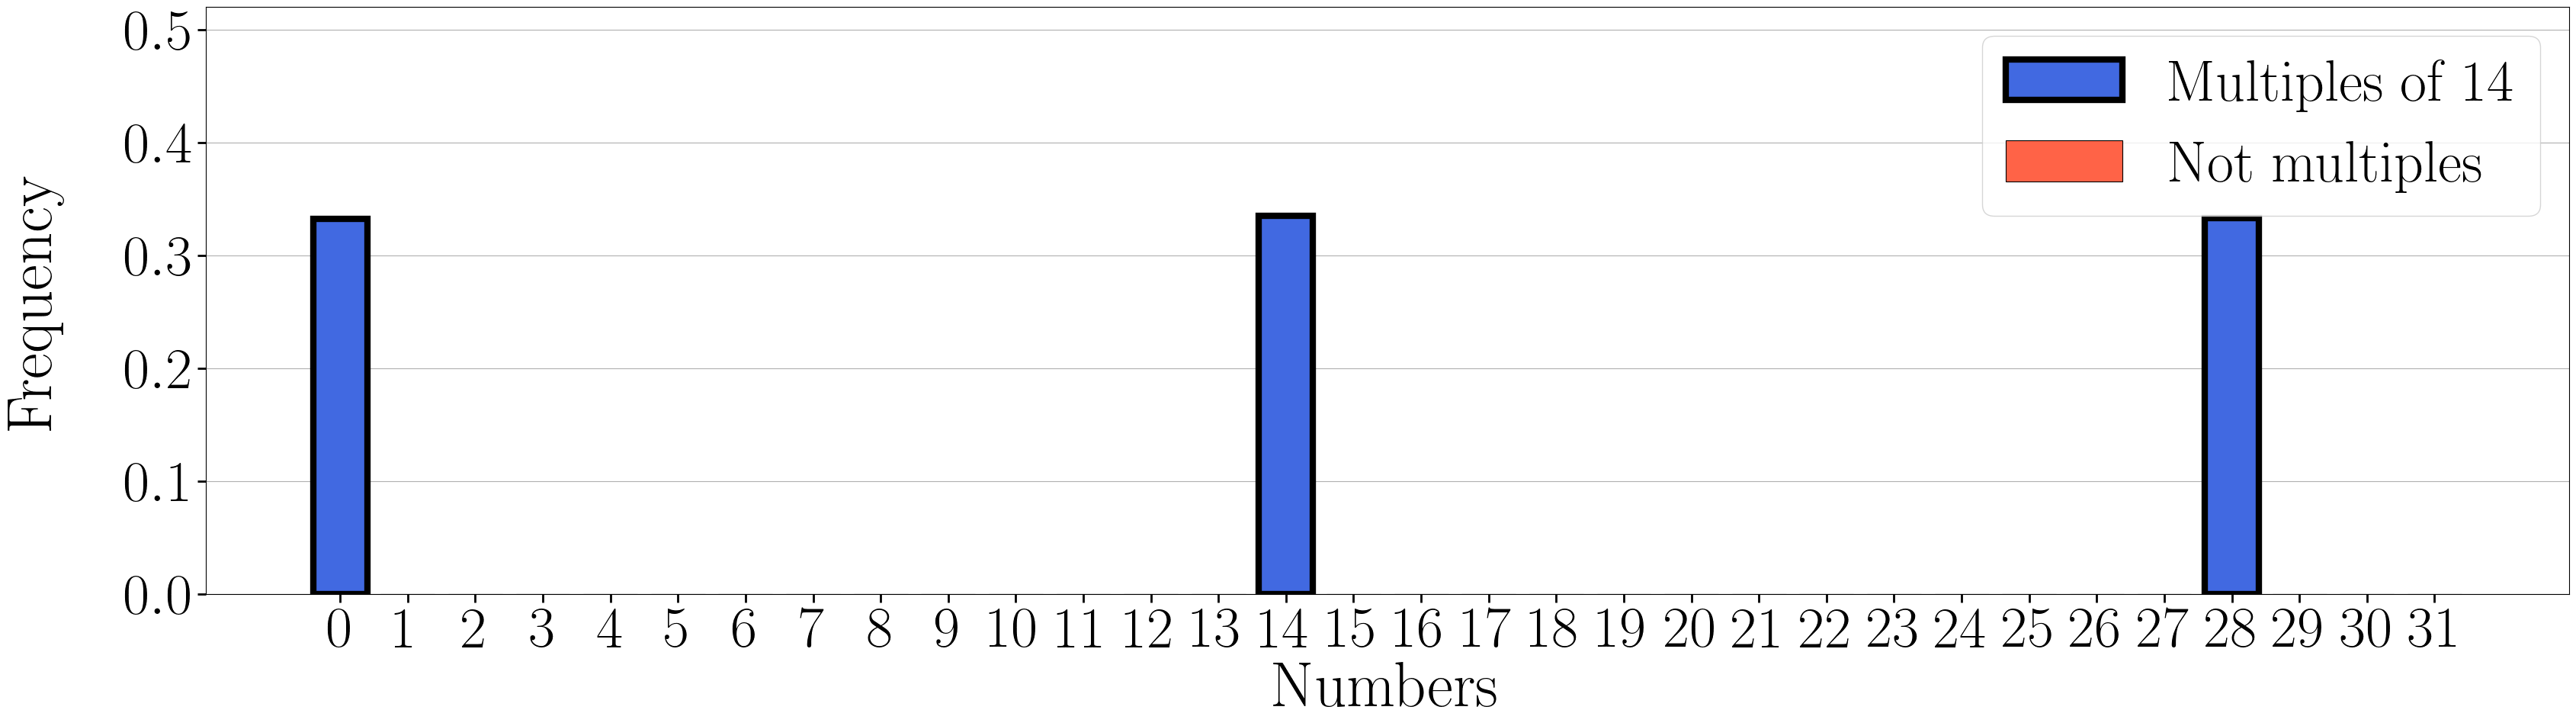

In [61]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.set_yticks([a/10 for a in range(7)])

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%K==0 or a%5==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(0, 0.52)
    

ax.legend(fontsize=fontsize-5, loc='upper right')

ax.tick_params(width=2, size=8)

plt.savefig(fname='plots_simulations/simulation_%d_K_%d_qubits_two_reps.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)